## Observations and Insights
Ramicane and Capomulin had the smaller average tumor volumes at 40.21 mm3 and 40.67 mm3 respectively.  Thus, they seem to be more effective in reducing the tumor volume, although there was a wide range between lower and upper whiskers in the boxplot suggesting a large variability in volume for both.  Capomulin and Ramicane had also the higher number of data points (230 and 228).
After an initial increase in tumor volume, Capomulin produce a considerable decrease in volume around day 25 and continue to decrease through day 35 approximately. For mice treated with this drug regimen, there was a positive correction between mouse weight and the average tumor volume.
Infubinol had a much lesser degree of tumor volume reduction, but had an outlier with about the same size of tumor as the median for Capomulin and Ramicane.
The sex distribution for the mice in the study was relatively equal. 

---

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()
study_results.head()

# # # Combine the data into a single dataset

merged_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# # # Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [74]:
# Check the number of mice.
mice_number = len(merged_data["Mouse ID"].unique())
mice_number

249

In [75]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [76]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_data.loc[merged_data["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [77]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = merged_data.loc[merged_data['Mouse ID'] != "g989"]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [78]:
# Check the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume = clean_data.groupby(clean_data["Drug Regimen"])
tumor_volume

vol_mean = tumor_volume["Tumor Volume (mm3)"].mean()
vol_mean

vol_median = tumor_volume["Tumor Volume (mm3)"].median()
vol_median

vol_var = tumor_volume["Tumor Volume (mm3)"].var()
vol_var

vol_std = tumor_volume["Tumor Volume (mm3)"].std()
vol_std

vol_sem = tumor_volume["Tumor Volume (mm3)"].sem()
vol_sem

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
summary_stats = pd.DataFrame({"Mean Tumor Volume":vol_mean,
                               "Median Tumor Volume":vol_median,
                               "Tumor Volume Variance":vol_var,
                               "Tumor Volume Std. Dev.":vol_std,
                               "Tumor Volume Std. Err.":vol_sem
                              })

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [80]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use method to produce everything with a single groupby function
summary_agg = clean_data.groupby(["Drug Regimen"]).agg({'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]})
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [81]:
mice_per_reg = clean_data["Drug Regimen"].value_counts()
mice_per_reg.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

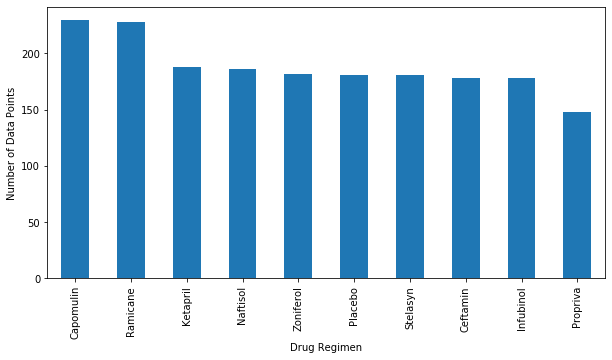

In [84]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_per_reg.plot(kind="bar", figsize=(10,5))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.savefig('barchart')
plt.show()

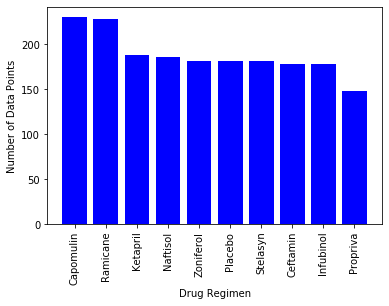

In [85]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(mice_per_reg.index, mice_per_reg.values, color='b', align='center')
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.savefig('barchart_py')
plt.show()

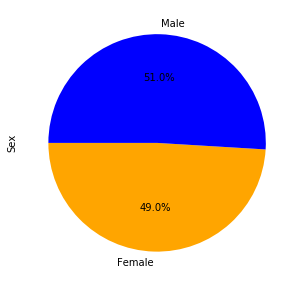

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_data.groupby(clean_data["Sex"])
mice_gender

gender_count = mice_gender["Sex"].count()
gender_count

colors = ['orange', 'blue']
gender_count.plot.pie(y = "Sex", figsize=(5,5), colors =colors, autopct="%1.0f.0%%", startangle=180)
plt.savefig('pie')
plt.show()

In [ ]:
# calculate gender percentage
gender_count.index

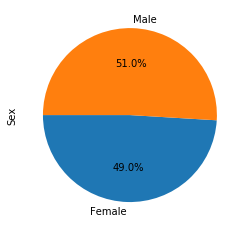

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count.values, labels=gender_count.index, autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")
plt.savefig('pie_py')
plt.show()

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_timepoint = pd.merge(last_timepoint, clean_data, on=['Mouse ID',"Timepoint"], how="left")
merged_timepoint                       

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [89]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_timepoint[merged_timepoint["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    # add subset to tumor volume data list
    tumor_vol_list.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'{drug}: {outliers}')

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


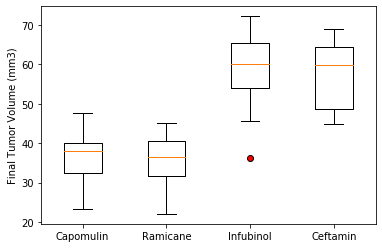

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
labels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
outlier = dict(markerfacecolor='r', marker='o')
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list, labels=labels, flierprops=outlier)
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

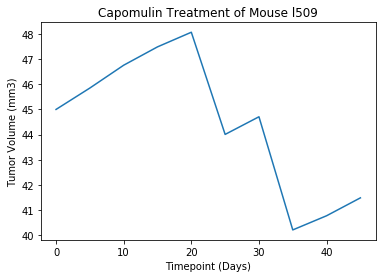

In [91]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse = clean_data.loc[clean_data['Mouse ID'] == "l509"]
cap_mouse

time = cap_mouse["Timepoint"]
tum_vol = cap_mouse["Tumor Volume (mm3)"]

plt.plot(time, tum_vol)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('linechart')
plt.show()

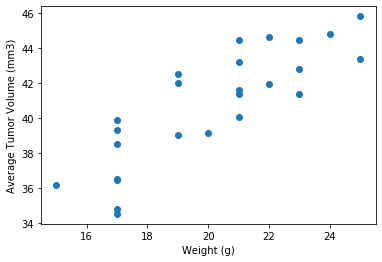

In [92]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_treated = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"]

cap_avg = cap_treated.groupby(['Mouse ID']).mean()

plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


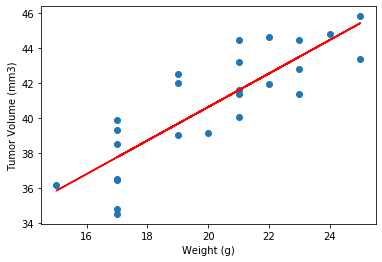

In [95]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
y_values = cap_avg['Weight (g)']*slope+intercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('lin_regression')
plt.show()